In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

import matplotx
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [6]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count"]
)

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std"])

In [8]:
compiled_grouped_res

mae                     max_error  \
                                       mean         std count        mean   
representation num_train_points                                             
SMILES         10                 59.133152    8.856563     3  175.000000   
               20                 65.279578   12.732289     7  159.285714   
               50                 39.281937    2.790401     6  207.166667   
               100                34.215408    3.987879     8  172.125000   
               200                28.156931    4.250790     7  253.285714   
inchi          10                122.532881   30.963077     8  343.875000   
               20                 56.353120   14.785678     8  188.625000   
               50                 38.661000    3.726683     9  166.111111   
               100                37.460414    4.249823     9  244.111111   
               200                27.045440    3.699894     9  156.222222   
name           10                       NaN         NaN     0         NaN   
               20                289.866222  154.890492     2  473.749400   
               50                 86.648174   59.466037     7  175.857143   
               100                41.389176   10.415074     8  159.625000   
               200                30.890190    5.832380     7  120.142857   
selfies        10                 61.644294    7.161938     6  246.666667   
               20                 60.247081   13.268126    11  215.272727   
               50                 39.913199    4.709265    10  213.860000   
               100                34.539729    3.341989    11  190.363636   
               200                30.561818    4.633605    11  204.000000   

                                                             mse  \
                                        std count           mean   
representation num_train_points                                    
SMILES         10                 33.181320     3    5631.299114   
               20                 13.034752     7    6488.164335   
               50                 63.161433     6    3162.028540   
               100                54.270322     8    2372.072706   
               200               181.261978     7    2407.061154   
inchi          10                 85.011659     8   22419.838823   
               20                 62.962432     8    5499.786673   
               50                 45.731402     9    2891.281804   
               100                85.553265     9    3447.036081   
               200                21.241338     9    1740.826637   
name           10                       NaN     0            NaN   
               20                 93.690800     2  100772.815798   
               50                 40.147348     7   13407.563087   
               100                33.273488     8    3771.613658   
               200                48.057010     7    2240.904723   
selfies        10                 35.330818     6    6840.046175   
               20                 69.378802    11    6059.307882   
               50                 72.466210    10    3346.915649   
               100                54.555060    11    2644.756924   
               200                95.970829    11    2465.323998   

                                                     
                                          std count  
representation num_train_points                      
SMILES         10                  936.646142     3  
               20                 2030.981417     7  
               50                  292.822024     6  
               100                 517.431382     8  
               200                1645.387792     7  
inchi          10                 9146.149888     8  
               20                 2919.016212     8  
               50                  613.455050     9  
               100                1315.576648     9  
               200                 518.721763     9  
n

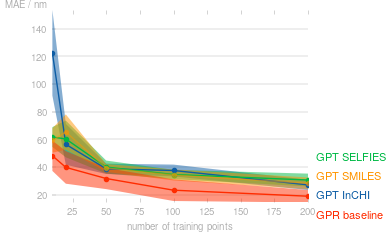

In [10]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1, 1)

    # ax.plot(
    #     compiled_grouped_res.loc["name", :].index,
    #     compiled_grouped_res.loc["name", :]['mae']['mean'],
    #     label='GPT Name',
    #     marker='o'
    # )

    # ax.fill_between(
    #     compiled_grouped_res.loc["name", :].index,
    #     compiled_grouped_res.loc["name", :]['mae']['mean'] - compiled_grouped_res.loc["name", :]['mae']['std'],
    #     compiled_grouped_res.loc["name", :]['mae']['mean'] + compiled_grouped_res.loc["name", :]['mae']['std'],
    #       alpha=.5
    # )

    ax.plot(
        compiled_grouped_res.loc["inchi", :].index,
        compiled_grouped_res.loc["inchi", :]["mae"]["mean"],
        label="GPT InCHI",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["inchi", :].index,
        compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
        - compiled_grouped_res.loc["inchi", :]["mae"]["std"],
        compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
        + compiled_grouped_res.loc["inchi", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_grouped_res.loc["selfies", :].index,
        compiled_grouped_res.loc["selfies", :]["mae"]["mean"],
        label="GPT SELFIES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["selfies", :].index,
        compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
        - compiled_grouped_res.loc["selfies", :]["mae"]["std"],
        compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
        + compiled_grouped_res.loc["selfies", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index,
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"],
        label="GPT SMILES",
        marker="o",
        alpha=0.5,
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index,
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
        - compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
        + compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped["mae"]["mean"],
        label="GPR baseline",
        marker="o",
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["std"],
        compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["std"],
        alpha=0.5,
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel("number of training points", labelpad=4)
    matplotx.ylabel_top("MAE / nm")
    # ax.set_xscale('log')
    # ax.set_yscale('symlog')
fig.savefig("phoswitch_regression_res.pdf", bbox_inches="tight")